<a href="https://colab.research.google.com/github/shuvo1165/Machine-Learning/blob/main/callback_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class myClassback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.9):
      print("\n Reached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

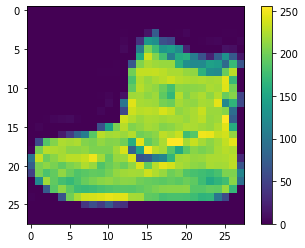

In [5]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
X_train = X_train/255.0
X_test = X_test/255.0

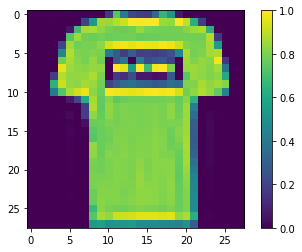

In [7]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

CallBack

In [8]:
callbacks = myClassback()

In [9]:
model = keras.models.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(512,activation=tf.nn.relu),
                          keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
model.fit(X_train,y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4761 - accuracy: 0.8303
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3575 - accuracy: 0.8693
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3227 - accuracy: 0.8820
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2972 - accuracy: 0.8903
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2802 - accuracy: 0.8951
Epoch 6/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.2655 - accuracy: 0.9015
 Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2653 - accuracy: 0.9015


In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3514 - accuracy: 0.8764

Test accuracy: 0.8763999938964844


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


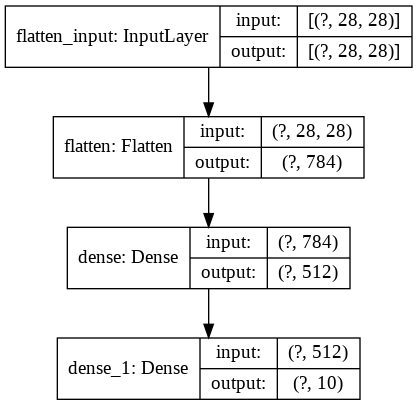

In [14]:
keras.utils.plot_model(model, "mnsit_model.png", show_shapes=True)